In [47]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Data
data = {
    'Number UEs': [16, 32, 64, 128, 256, 512, 1024],
    'E2Nodes ON': [1, 1, 1, 2, 5, 9, 17],
    'E2Nodes OFF':[16, 16, 16, 15, 12, 8, 0],
    'Energy Consumed (W)' : [15.4757, 15.4757, 15.4757, 30.9521, 77.3785, 139.2813, 263.0869],
    'Energy Consumed per UE (W)': [0.96723125, 0.483615625, 0.2418078125, 0.24181328125, 0.302259765625, 0.2720337890625, 0.25692080078125]
}
# Set seaborn style
sns.set(style="darkgrid")

normalized_data = {
    'Number UEs': [16, 32, 64, 128, 256, 512, 1024],
    'E2Nodes ON': [1.0, 1.0, 1.0, 7.1875, 25.75, 50.5, 100.0],
    #'E2Nodes OFF': [100.0, 100.0, 100.0, 93.8125, 75.25, 50.5, 1.0],
    'Energy Consumed': [1.0, 1.0, 1.0, 7.187779874254477, 25.749999999999996, 50.499999999999986, 100.0],
    #'Energy Consumed Per UE': [100.0, 34.00000000000001, 1.0, 1.0007463313452725, 9.250000000000002, 5.124999999999997, 3.0625000000000027],
    'rApp Time': [1.0, 1.337407050399339, 2.656361883778573, 7.366427981272376, 17.256885155604515, 41.349111814927014, 100.0],
    'rApp CPU': [1.9221352648616468,  1.0,  6.697347042553983,  12.357857789574211,  30.00244335024248,  53.33209718828681,  100.0],
    'rApp Memory': [1.0,  2.216880633706638,  7.019696023724978,  17.340968509774846,  32.0275588246771,  57.12041011433254,  100.0],
    'xApp Handover CPU': [1.0,  6.500000000000013,  33.99999999999999,  50.5,  67.00000000000001,  83.50000000000001,  100.0],
    'xApp Handover Memory': [1.0,  2.064516129032329,  61.6774193548387,  87.2258064516129,  91.48387096774194,  95.74193548387098,  100.0],
    'xApp Handover Time': [1.0,  6.21648673880172,  17.364338314879355,  37.27121612425304,  62.805104742874775,  87.39408021943355,  100.0]
}


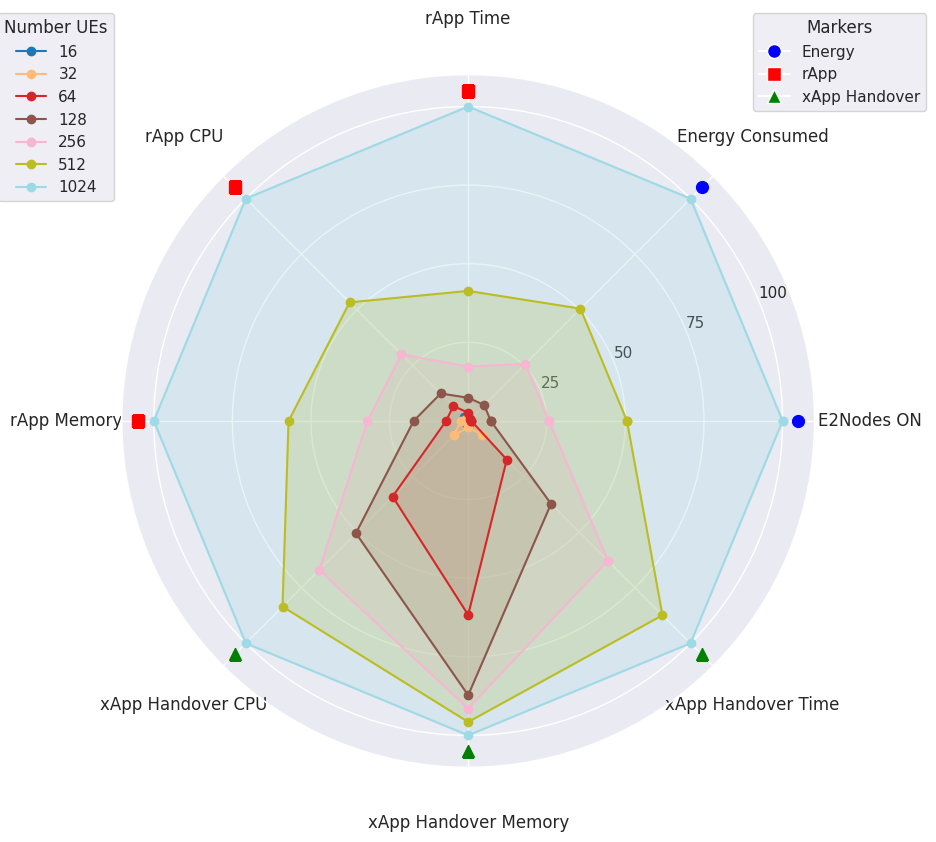

In [49]:
# Prepare the data for the spider plot
categories = list(normalized_data.keys())[1:]  # Exclude 'Number UEs'
labels = normalized_data['Number UEs']
num_vars = len(categories)

# Create a 2D array of the data
values = np.array([normalized_data[category] for category in categories])

def create_spider_plot(values, labels, categories):
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(9, 9), subplot_kw=dict(polar=True))

    colors = plt.cm.tab20(np.linspace(0, 1, len(labels)))

    for idx, (val, color) in enumerate(zip(values.T, colors)):
        data = val.tolist()
        data += data[:1]
        ax.fill(angles, data, color=color, alpha=0.25)
        ax.plot(angles, data, label=labels[idx], color=color, marker='o')

    ax.plot(angles[0], 105, marker='o', color='blue', markersize=8.5)
    ax.plot(angles[1], 105, marker='o', color='blue', markersize=8.5)
    ax.plot(angles[2], 105, marker='s', color='red', markersize=8.5)
    ax.plot(angles[3], 105, marker='s', color='red', markersize=8.5)
    ax.plot(angles[4], 105, marker='s', color='red', markersize=8.5)
    ax.plot(angles[5], 105, marker='^', color='green', markersize=8.5)
    ax.plot(angles[6], 105, marker='^', color='green', markersize=8.5)
    ax.plot(angles[7], 105, marker='^', color='green', markersize=8.5)


    ax.set_yticks([25,50,75, 100])  # Adjusted for log scale, using powers of 10
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(categories, fontsize=12)
    #ax.set_yscale('log')
    ax.tick_params(axis='x', labelsize=12, pad=27)  # Set y tick label size and pad


    # Add the first legend
    legend1 = ax.legend(loc='upper right', bbox_to_anchor=(1.1, 1.1), title="Number UEs")

    # Add the second legend for markers
    markers = [
        ('o', 'blue', 'Energy'),
        ('s', 'red', 'rApp'),
        ('^', 'green', 'xApp Handover')
    ]
    handles = [plt.Line2D([0], [0], marker=marker, color='w', markerfacecolor=color, markersize=10, label=label)
               for marker, color, label in markers]
    legend1 = ax.legend(loc='upper right', bbox_to_anchor=(0, 1.1), title="Number UEs")

    legend2 = ax.legend(handles=handles, loc='upper left', bbox_to_anchor=(0.9, 1.1), title="Markers")
    ax.add_artist(legend1)

    # Save the plots
    plt.savefig('out/energy-radar.pdf', bbox_inches='tight')
    plt.savefig('out/energy-radar.png', dpi=300, bbox_inches='tight')
    plt.show()

create_spider_plot(values, labels, categories)
